In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

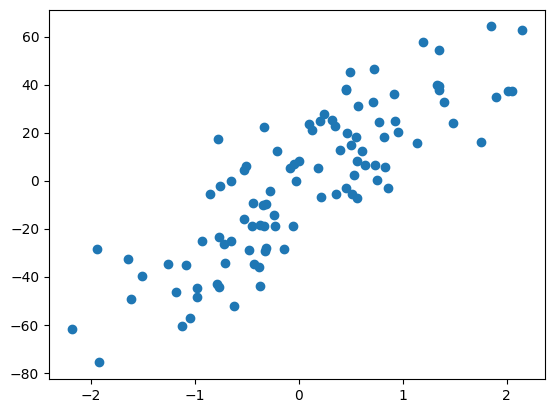

In [15]:
plt.scatter(X,y)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [43]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [42]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.6375011587464419)

In [44]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        X = X.ravel()

        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - (self.m * X) - self.b)
            loss_slope_m = -2 * np.sum((y - (self.m * X) - self.b) * X)
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)

            print(f"Epoch {i+1}: m={self.m}, b={self.b}")

        print("Final m and b:", self.m, self.b)
    
    def predict(self, X):
        X = X.ravel()   # ensures consistent behavior
        return self.m * X + self.b


In [45]:
gd = GDRegressor(0.001,100)

In [46]:
gd.fit(X_train,y_train)

Epoch 1: m=90.04629892211885, b=-101.74579222551124
Epoch 2: m=81.45526459363266, b=-86.33159805246282
Epoch 3: m=74.04311055612814, b=-73.31405765077903
Epoch 4: m=67.65034931588339, b=-62.31925945284707
Epoch 5: m=62.13866746737299, b=-53.03182533775812
Epoch 6: m=57.388186604948714, b=-45.185716863687844
Epoch 7: m=53.295065421356476, b=-38.55649030694167
Epoch 8: m=49.76940295441548, b=-32.95477146340025
Epoch 9: m=46.73340716346203, b=-28.22075749072971
Epoch 10: m=44.119796891300396, b=-24.219583614929572
Epoch 11: m=41.87040880112064, b=-20.837418214159634
Epoch 12: m=39.93498408345094, b=-17.978171400492243
Epoch 13: m=38.27011262242971, b=-15.560720396685232
Epoch 14: m=36.83831491296171, b=-13.516570296741047
Epoch 15: m=35.607244351591326, b=-11.787881665108163
Epoch 16: m=34.54899460565792, b=-10.325807255788309
Epoch 17: m=33.63949861883491, b=-9.089089243664636
Epoch 18: m=32.8580074572265, b=-8.042876028669264
Epoch 19: m=32.186638658597445, b=-7.157724128122485
Epoch 20

In [48]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.634515826773629